In [90]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [91]:
dir_path = "/home/hgtllys/ros2_ws/data/2024-04-10-18-16-55"

In [92]:
filepaths = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith('.csv')]

In [93]:
dfs = [pd.read_csv(f) for f in filepaths]
gains = [fp.split('/')[-1].split('.')[0].replace("gain=", '') for fp in filepaths]

for df in dfs:
    df["time"] = 0.032 * df.index

In [94]:
gains

['100', '400', '0', '200']

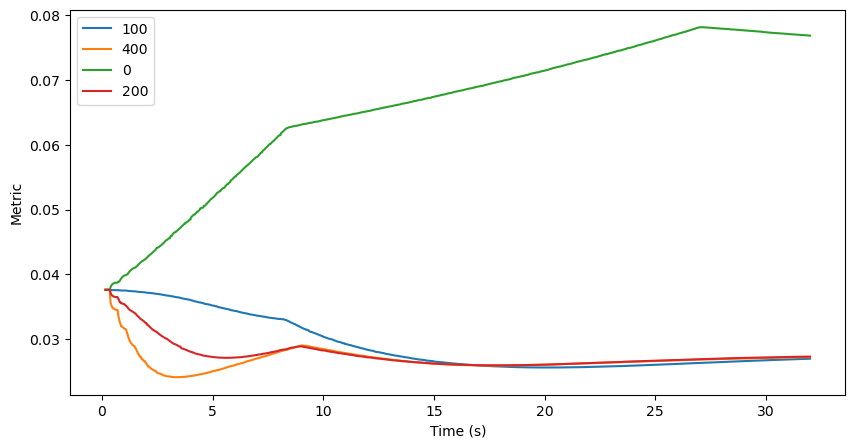

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for df, gain in zip(dfs, gains):
    ax.plot(df["time"].values[5:], abs(df["metric"][5:].values), label=gain)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Metric")
ax.legend()

plt.show()

In [96]:
dfs[0].head()

,metric,joint_0,joint_1,joint_2,joint_3,joint_4,x,y,z,x_,y_,z_,time
0,-0.037623,1.007811,-0.952953,0.847771,0.631682,-0.819567,0.097066,0.19683,0.089759,0.01416,0.151268,0.122175,0.000
1,-0.037623,1.007811,-0.952953,0.847771,0.631682,-0.819567,0.097066,0.19683,0.089759,0.01416,0.151268,0.122175,0.032
2,-0.037623,1.007812,-0.952953,0.847771,0.631682,-0.819567,0.097066,0.19683,0.089759,0.01416,0.151268,0.122175,0.064
3,-0.037623,1.007812,-0.952953,0.847771,0.631682,-0.819567,0.097066,0.19683,0.089759,0.01416,0.151268,0.122175,0.096
4,-0.037623,1.007812,-0.952953,0.847771,0.631682,-0.819567,0.097066,0.19683,0.089759,0.01416,0.151268,0.122175,0.128


In [97]:
def compute_position_error(row, last_row):
    position = np.array([row["x"], row["y"], row["z"]])
    desired_posisition = np.array([last_row["x_"], last_row["y_"], last_row["z_"]])
    return np.linalg.norm(position - desired_posisition)

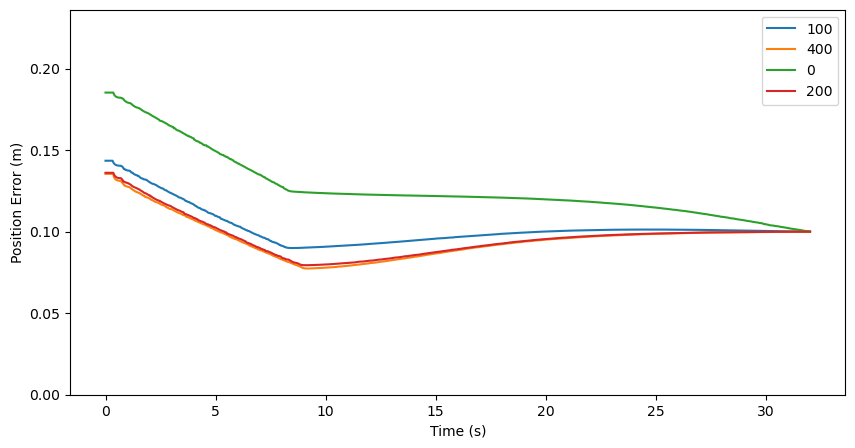

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for df, gain in zip(dfs, gains):
    df["position_error"] = df.apply(lambda row: compute_position_error(row, df.iloc[-1]), axis=1)
    ax.plot(df["time"].values, df["position_error"].values, label=gain)
    # set y limits
    ax.set_ylim(0, max(df["position_error"].values) + 0.1)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Position Error (m)")
ax.legend()

plt.show()

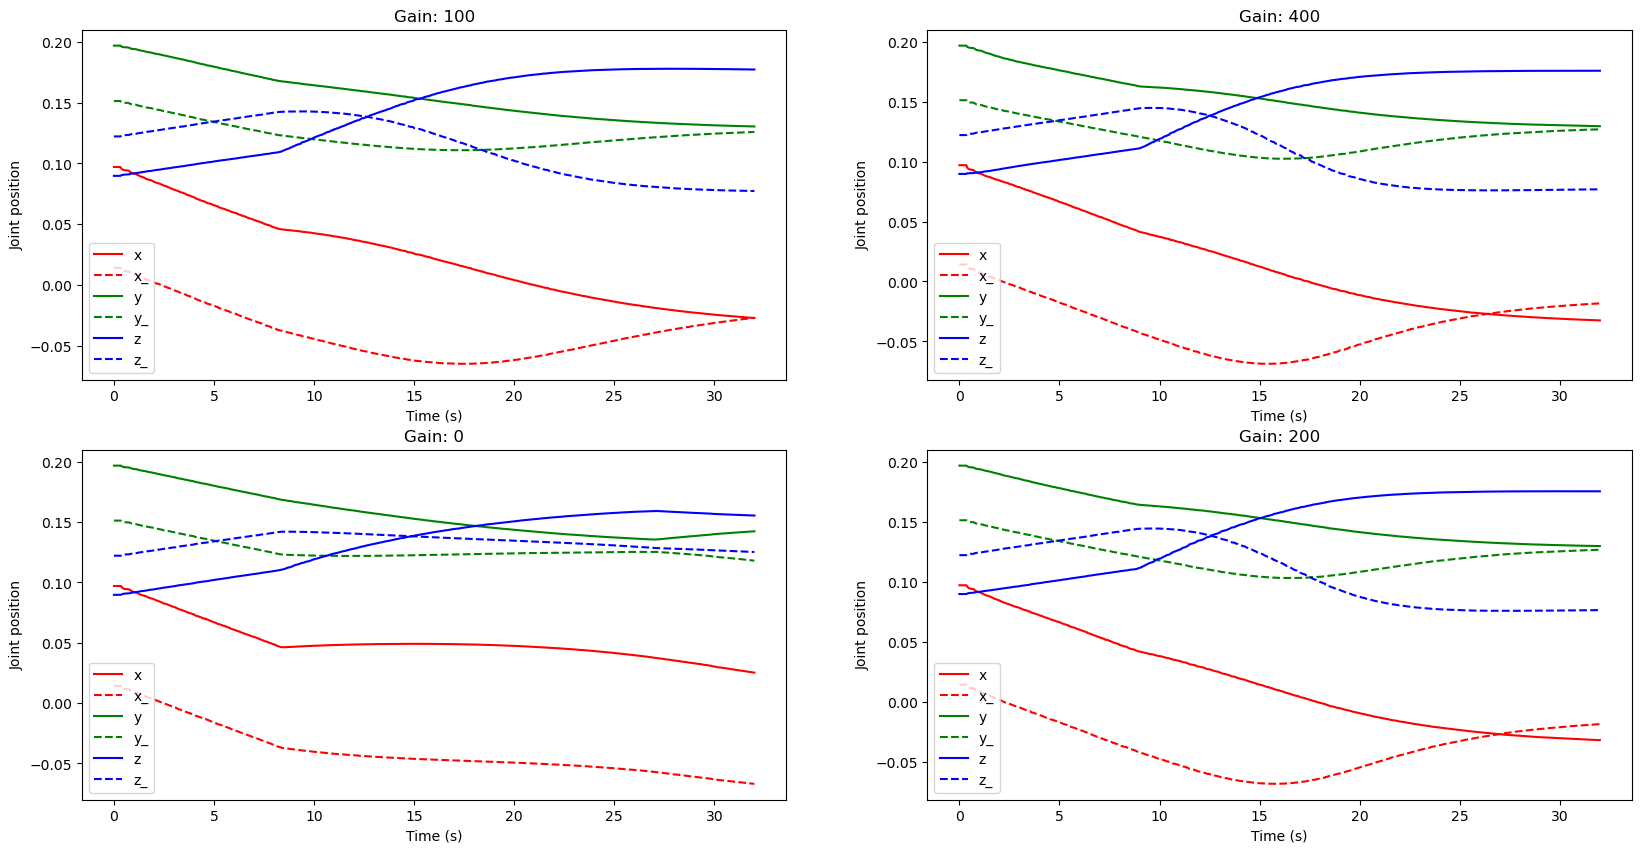

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

colors = ["red", "green", "blue"]

for i, (df, gain) in enumerate(zip(dfs, gains)):
    x, y = i // 2, i % 2
    for pos, color in zip(["x", "y", "z"], colors):
        ax[x, y].plot(df["time"].values, df[pos].values, label=pos, color=color)
        ax[x, y].plot(df["time"].values, df[f"{pos}_"].values, label=f"{pos}_", linestyle="--", color=color)

    ax[x, y].set_title(f"Gain: {gain}")
    ax[x, y].set_xlabel("Time (s)")
    ax[x, y].set_ylabel("Joint position")
    ax[x, y].legend(loc="lower left")
    
plt.show()

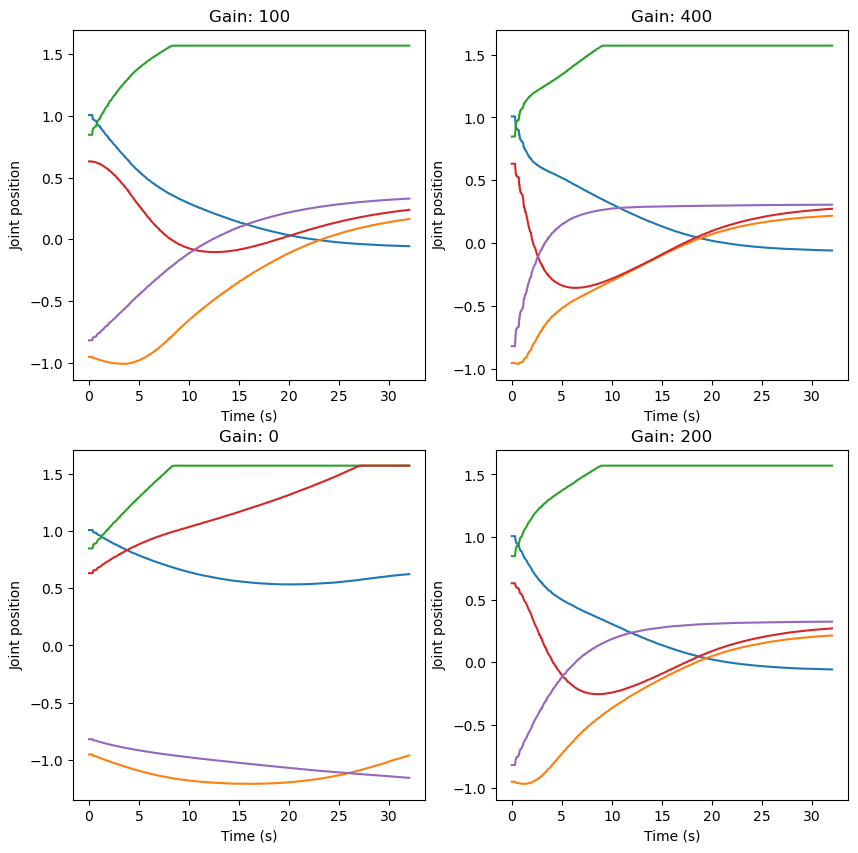

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, (df, gain) in enumerate(zip(dfs, gains)):
    x, y = i // 2, i % 2
    for joint in range(5):
        ax[x, y].plot(df["time"].values, df[f"joint_{joint}"].values, label=f"joint_{joint}")

    ax[x, y].set_title(f"Gain: {gain}")
    ax[x, y].set_xlabel("Time (s)")
    ax[x, y].set_ylabel("Joint position")

plt.show()